# Imports

In [2]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
import scipy.stats as stats 
import sympy as sy 
from scipy.optimize import fsolve
import time
import os

In [5]:
from functions.plot import *
from models.model import model 
from models.model import model_gamma_4_16, model_gamma_02_08

# Constants

In [3]:
# # We want to take time horizon as 100 years which is 36525 days including the years with more or less days
u0List = [16000 * i for i in [0,1,2,3,4,5]]
thetaList = [0.01, 0.1, 0.5, 0.9, 1 ,2]

### Use Monte Carlo simulation to investigate the influence of the premium c and the initial capital u on the ruin probability ψ(u).

In [7]:
# The model is developed in this document 
# Refer to "/src/models/model.py"


In [4]:
# Find the time horizon (we found it to be 2000 )
LAMBDA_ARRIVAL= 4
CLAIMSIZE_MEAN = 16000 
TIME_HORIZON = 2000  
# we will try to find a time horizon that is not very big, but enough to simulate 
# model(2000, lambda_arrival, claimSize_mean).simulate((16000,), (0.01,))

Claim Sizes ~ U(a=10000,b=22000)


In [ ]:
# TODO: Uncomment 
# q1_model = model(TIME_HORIZON, LAMBDA_ARRIVAL, CLAIMSIZE_MEAN)
# q1_model.set_name("q1_model")
# df = q1_model.simulate(u0List, thetaList)
# df

In [9]:
# TODO: REMOVE THIS BOX SINCE THIS IS JUST DEBUG
df = pd.read_csv("./results/q1_model_simulation_results.csv")

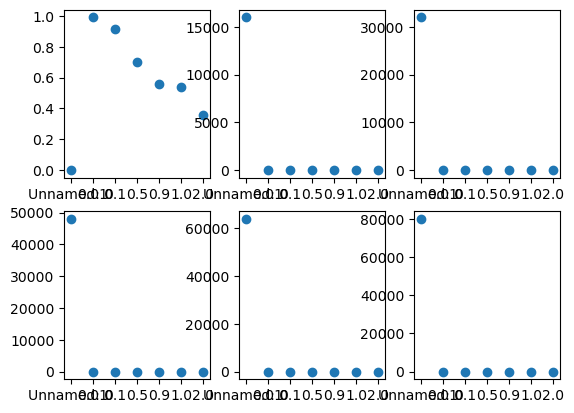

In [10]:
# effect of theta 


fig, axs = plt.subplots(nrows=2, ncols=3)
axs = axs.flatten() 

for i in range(len(df.index)): 
    axs[i].scatter(x=df.columns, y=df[df.index==df.index[i]])



# df.plot()
# plt.scatter(x=df.columns, y=df[df.index==])
# plt.scatter(x=df.columns, y=df[df.index==])
# df[df.index==0]
# plt.scatter(x=df.columns, y=df[df.index==0],)


ValueError: x and y must be the same size

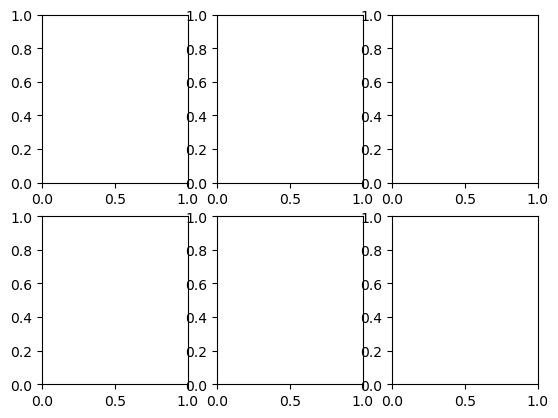

In [11]:
# Effect of  
fig, axs = plt.subplots(nrows=2, ncols=3)
axs = axs.flatten() 

for i in range(len(df.index)): 
    axs[i].scatter(x=df.index, y=df[df.index==df.index[i]])

### Determine the distribution of the maximal aggregate loss in case of Erlang-2 distributed claim sizes with mean 16 thousand PLZ, and give an explicit expression for the ruin probability ψE2(u).

In [97]:
# R, t = sy.symbols("R theta")

# eq = sy.Eq(16000 * R * (1 + t) + 1, 1 / ((1 - 8000 * R) ** 2))
# # sy.solve(eq, R)[2].subs({t:0}).evalf()
# eq1 = sy.solve(eq, R)[1]
# eq2 = sy.solve(eq, R)[2]

# # thetaList = [i / 1000 for i in range(1,10000)] # we assume that theta>0
# # plt.plot(thetaList, [eq1.subs({t:theta})for theta in thetaList], color="b")
# # plt.plot(thetaList, [eq2.subs({t:theta})for theta in thetaList], color="r")
# # thetaList
# eq1.subs({t:0.0001})

In [5]:
# Approximation 1
a, b, theta, R = sy.symbols("a b theta R")
expr1 = 1 + (1 + theta) * 16000 * R
expr2 =  (sy.exp(b * R) - sy.exp(a * R)) / (R * (b-a))

eq = sy.Eq(expr1, expr2)
eq

Eq(R*(16000*theta + 16000) + 1, (-exp(R*a) + exp(R*b))/(R*(-a + b)))

In [6]:

# Define the equation as a Python function
def equation(R, theta, a=10000, b=22000, E_Xi=16000):
    return 1 + (1 + theta) * E_Xi * R - (np.exp(b * R) - np.exp(a * R)) / (R * (b - a))

def check_equivalence(sol, theta_value):

    val1 = expr1.subs({a:10000, b:22000, R:sol, theta:theta_value}).evalf()
    val2 = expr2.subs({a:10000, b:22000, R:sol }).evalf()
    f = lambda x: np.float64(x)

    return np.isclose(f(val1),f(val2), atol=1e-9, rtol=1e-9)

In [8]:
# We find the smallest R possible within 

theta_value = 0.2  # Replace with the desired theta value

sol = np.inf
lastValue = None 
valList = []
for j in range(len(thetaList)):
    for i in range(500, 0, -1): # this is accurate in between [1e300, 1e-300]   
        val = fsolve(equation, x0=float(f"0.01"), args=(thetaList[j]))[0]
    
    if val < 0: # we are looking for the positive solution 
        continue

    if (val < sol) and (check_equivalence(val, thetaList[j])):
        valList.append(val)
        lastValue = i-300

# for i in range(10000, 1, -1): # this is just to see if we can find a more accurate value which is between 
#     val = fsolve(equation, x0=float(f"1e{i-300}"), args=(theta_value))[0]
    
#     if val < 0: # we are looking for the positive solution 
#         continue

#     if (val < sol) and (check_equivalence(val, theta_value)):
#         sol = val
#         lastValue = i-300


for i in range(len(thetaList)):
    print(f"For theta value: {thetaList[i]}, the value of R is: {valList[i]}")
# lastValue

For theta value: 0.01, the value of R is: 1.1858148866695392e-06
For theta value: 0.1, the value of R is: 1.1176320622201771e-05
For theta value: 0.5, the value of R is: 4.504943160794222e-05
For theta value: 0.9, the value of R is: 6.874582233410305e-05
For theta value: 1, the value of R is: 7.368425288484671e-05
For theta value: 2, the value of R is: 0.00011059994869610284


In [ ]:
theta, R, u, E_Xi= sy.symbols("theta R u E_Xi")
psi = sy.Function("psi")(u)
E_Xi=16000

approx1 = sy.Eq(psi, (1/(1+theta))*sy.exp(-R*u))
approx2 = sy.Eq(psi,(1/(1+theta))*sy.exp(-(theta)/((1+theta)*E_Xi)*u))
approx1_subs = []
approx2_subs = []

for i in range(len(thetaList)):
    for j in range(len(u0List)):
        subs_result1 = approx1.subs({theta: thetaList[i], R: valList[i], u: u0List[j]})
        subs_result2 = approx2.subs({theta: thetaList[i], E_Xi: E_Xi, u: u0List[j]})
        approx1_subs.append(subs_result1)
        approx2_subs.append(subs_result2)

psi_values1 = []
for eq in approx1_subs:
    result = sy.solve(eq)
    psi_values1.append(result)


psi_values2 = []
for eq in approx2_subs:
    result = sy.solve(eq)
    psi_values2.append(result)


results_approx1 = []
results_approx2 = []
for i, theta_val in enumerate(thetaList):
    for j, u_val in enumerate(u0List):
        psi1 = psi_values1[i * len(u0List) + j]
        psi2 = psi_values2[i * len(u0List) + j]
        results_approx1.append([theta_val, u_val, psi1])
        results_approx2.append([theta_val, u_val, psi2])


for i in range(len(thetaList)):
    print(f"For theta: {results_approx1[i][0]} and u0: {results_approx1[i][1]}, Ruin Probability for Approx1 is: {results_approx1[i][2]}")
    print(f"For theta: {results_approx2[i][0]} and u0: {results_approx2[i][1]}, Ruin Probability for Approx2 is: {results_approx2[i][2]}")
    print("")

df_approx1 = pd.DataFrame(results_approx1, columns=["Theta", "u0", "Ruin Probability Approx1"])
df_approx2 = pd.DataFrame(results_approx2, columns=["Theta", "u0", "Ruin Probability Approx2"])


approx1_csv_path = "./results/q4_results_approx1.csv"
approx2_csv_path = "./results/q4_results_approx2.csv"

df_approx1.to_csv(approx1_csv_path, index=False)
df_approx2.to_csv(approx2_csv_path, index=False)

approx1_csv_path, approx2_csv_path



For theta: 0.01 and u0: 0, Ruin Probability for Approx1 is: [{psi(0): 0.990099009900990}]
For theta: 0.01 and u0: 0, Ruin Probability for Approx2 is: [{psi(0): 0.990099009900990}]

For theta: 0.01 and u0: 16000, Ruin Probability for Approx1 is: [{psi(16000): 0.971490907895252}]
For theta: 0.01 and u0: 16000, Ruin Probability for Approx2 is: [{psi(16000): 0.980344419146587}]

For theta: 0.01 and u0: 32000, Ruin Probability for Approx1 is: [{psi(32000): 0.953232529964372}]
For theta: 0.01 and u0: 32000, Ruin Probability for Approx2 is: [{psi(32000): 0.970685931953377}]

For theta: 0.01 and u0: 48000, Ruin Probability for Approx1 is: [{psi(48000): 0.935317303330079}]
For theta: 0.01 and u0: 48000, Ruin Probability for Approx2 is: [{psi(48000): 0.961122601495943}]

For theta: 0.01 and u0: 64000, Ruin Probability for Approx1 is: [{psi(64000): 0.917738778744100}]
For theta: 0.01 and u0: 64000, Ruin Probability for Approx2 is: [{psi(64000): 0.951653490277119}]

For theta: 0.01 and u0: 80000, 

('./results/q4_results_approx1.csv', './results/q4_results_approx2.csv')

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_367/4166087814.py:40: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Ruin Probability $\psi(u)$')


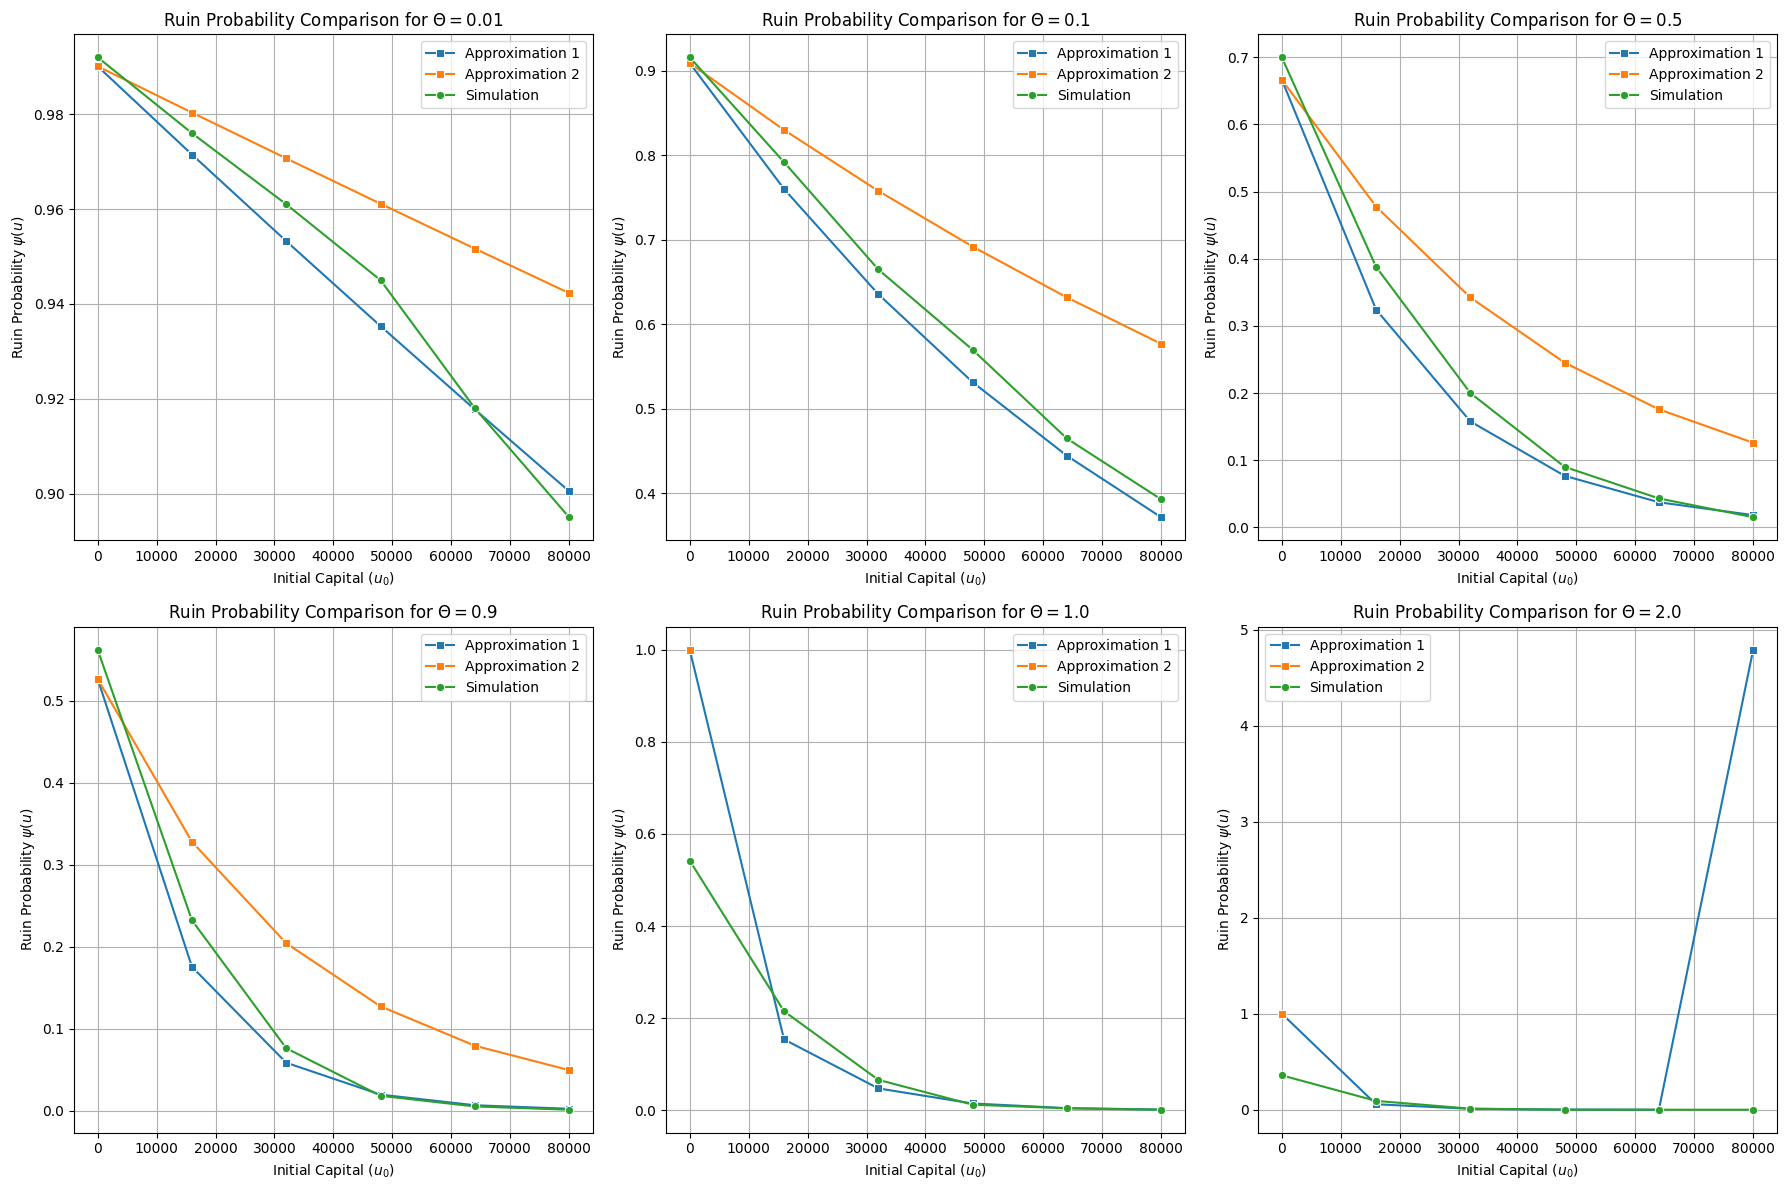

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the two CSV files
sim = pd.read_csv("/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q1_model_simulation_results.csv", index_col=0)
approx1 = pd.read_csv('/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q4_results_approx1.csv')
approx2 = pd.read_csv('/home/isikali/2df30-2024-25-assignments/Insurance Risk Assignment/2df30-2024-25-assignments/Insurance Risk Assignment/src/results/q4_results_approx2.csv')

#Orginize sim
sim = sim.reset_index().melt(id_vars='index', var_name='Theta', value_name='psi')
sim.columns = ['u0', 'Theta', 'psi']
sim['Theta'] = sim['Theta'].astype(float)
sim['u0'] = sim['u0'].astype(int)

# Extract psi(u) values from strings
approx1['psi'] = approx1['Ruin Probability Approx1'].str.extract(r':\s*([\d\.]+)').astype(float)
approx2['psi'] = approx2['Ruin Probability Approx2'].str.extract(r':\s*([\d\.]+)').astype(float)
#print(approx1['psi'])
#print(approx1['u0'])

# Iterate over each unique Theta and plot separately
unique_theta =sim['Theta'].unique()

plt.figure(figsize=(18, 12))
for i, theta in enumerate(unique_theta):
    plt.subplot(2, 3, i+1)
    
    # Filter data for the current Theta
    sim_theta = sim[sim['Theta'] == theta]
    approx1_theta = approx1[approx1['Theta'] == theta]
    approx2_theta = approx2[approx2['Theta'] == theta]
    # Plot data
    sns.lineplot(data=approx1_theta, x='u0', y='psi', label='Approximation 1', marker='s')
    sns.lineplot(data=approx2_theta, x='u0', y='psi', label='Approximation 2', marker='s')
    sns.lineplot(data=sim_theta, x='u0', y='psi', label='Simulation', marker='o')
    
    plt.title(f'Ruin Probability Comparison for $\\Theta = {theta}$')
    plt.xlabel('Initial Capital ($u_0$)')
    plt.ylabel('Ruin Probability $\psi(u)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
# # [i/1000 for i in range(1, 1001)]
# for i in range(10000-1, 1, -1): 
#     if (i/10000 > 0.1 ) and (i/10000 < 10)
#     print(f"{i/10000}e{lastValue}") 
#     # break

# this checks every value for x0, that is between 10e300 to 0.1e-300# with am margin of 0.1
sol = np.inf
lastValue = None 
for i in range(50, 0, -1): # this is accurate in between [0.2e-300, 9.9e300] with step 0.1 
    for j in range(2, 100): 

        val = fsolve(equation, x0=float(f"{j/10}e{i-300}"), args=(theta_value))[0]
        
        if val < 0: # we are looking for the positive solution 
            continue

        if (val < sol) and (check_equivalence(val, theta_value)):
            sol = val
            lastValue = f"{j/10}e{i-300}"

KeyboardInterrupt: 

In [ ]:
print(sol, lastValue)

### Use Monte Carlo simulation to investigate the influence of the distribution of the inter- claim times on the ruin probability ψ(u). 

In [ ]:
from models.model import model_gamma_4_16, model_gamma_02_08

In [ ]:
mg416 = model_gamma_4_16(TIME_HORIZON, LAMBDA_ARRIVAL, CLAIMSIZE_MEAN)
mg416.set_name("mg416")
mg416.simulate(u0List, thetaList)

df = pd.read_csv("./results/q1_model_simulation_results.csv")


TypeError: model.__init__() missing 3 required positional arguments: 'time_horizon', 'lambda_arrival', and 'claimSize_mean'

In [ ]:
mg0208 = model_gamma_02_08(TIME_HORIZON, LAMBDA_ARRIVAL, CLAIMSIZE_MEAN)
mg0208.set_name("mg0208")
mg0208.simulate(u0List, thetaList)

Claim Sizes ~ U(a=10000,b=22000)

Time Horizon: 2 days.
u0 List: (16000,)
Safety Loading List: (1,)


Time taken for 1000 simulations: 0.6916558742523193 seconds, this is equal to 0.0006916558742523193 seconds per run.


,1
16000,0.629


In [2]:
[[None] * 5] * 3

[[None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None]]